In [2]:
# install necessary libraries for osmnx and visualization
import osmnx as ox
import pandas as pd
import numpy as np
import networkx 
import matplotlib

Below you'll find a plug and play with osmnx and plotting to familiarize myself with different aspects of it,
including the creation of a basic routing algorithm using osmnx 

In [164]:
# load in data from lincoln square from osmnx
lsq_name = "Lincoln Square, Chicago, Illinois, USA"

In [165]:
import folium # for plotting
graph = ox.graph_from_place(lsq_name, network_type='drive')
nodes, streets = ox.graph_to_gdfs(graph)

In [ ]:
ox.folium.plot_graph_folium(graph)

In [ ]:
# start exploring bike-specific features
bike_graph = ox.graph_from_place(lsq_name, network_type="bike")
ox.folium.plot_graph_folium(bike_graph)

In [259]:
# helper function that finds nearest node to lat long info based on gdf 
def get_nearest_node(node_gdf, coord):
    # calculate difference between lat and long in all nodes in data
    node_gdf['diff_lat'] = abs(node_gdf['y'] - coord[0])
    node_gdf['diff_long'] = abs(node_gdf['x'] - coord[1])
    # calculate smallest difference (simple addition of differences)
    node_gdf['coord'] = node_gdf['diff_lat'] + node_gdf['diff_long']
    # filter data for nearest node 
    nearest_node = node_gdf.loc[node_gdf['coord'] == node_gdf['coord'].min()]
    # return nearest node id
    return list(nearest_node.index)[0]
    
# function that, given two tuples of coordinates, and
# an osmnx graph, returns optimal route
def route_by_graph(coord1, coord2, ox_graph, weight_var):
    # create geopandas dataframe of graph
    nodes, edges = ox.graph_to_gdfs(ox_graph)

    # get closest nodes on graph to origin and destination
    coord1_node = get_nearest_node(nodes, coord1)
    coord2_node = get_nearest_node(nodes, coord2)

    # plot (example taken from osmnx git examples)
    route = ox.shortest_path(ox_graph, coord1_node, coord2_node, weight=weight_var)
    fig, ax = ox.plot_graph_route(ox_graph, route, route_color="y", route_linewidth=5, node_size=0) 

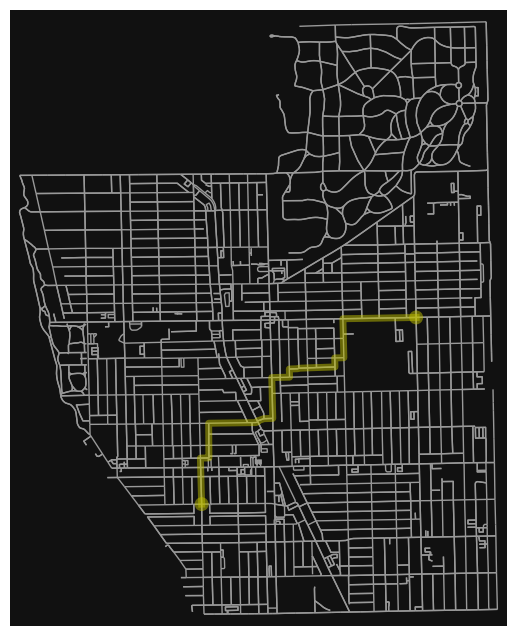

In [301]:
    
# run it on two bagel shops in lincoln square (coordinates pulled manually from google maps)
bean_bagel = (41.96679651618798, -87.69396103409798)
bagel_miller = (41.96660738036854, -87.68678658807178)
#route_by_graph(bean_bagel, bagel_miller, bike_graph)

# try route by not-bikeing
car_graph = ox.graph_from_place(lsq_name, network_type="drive")
#route_by_graph(bean_bagel, bagel_miller, car_graph)

# try new route further across square, from beans&bagels to side practice
side_practice = (41.97600416481625, -87.67910278807132)

route_by_graph(bean_bagel, side_practice, bike_graph, "length")
#route_by_graph(bean_bagel, side_practice, car_graph, "length")

In [291]:
# exploring edge attributes to see if we can simply add more info to 
# bike graph - bike nodes, bike edges
bn, be = ox.graph_to_gdfs(bike_graph)

# create node weights
be['highway'].value_counts() # check potential values 
# one thing we could discount for bike paths is if the street is a primary highway (sucks to bike on)

# base weight off of length as well to create length 
be['weight_cycle'] = np.where(be['highway']=='cycleway', 0.25, 1) * be['length']
be['weight_cycle'] = np.where(be['highway']=='primary', 2, 1) * be['length']

new_bike = ox.utils_graph.graph_from_gdfs(bn, be, graph_attrs=None)

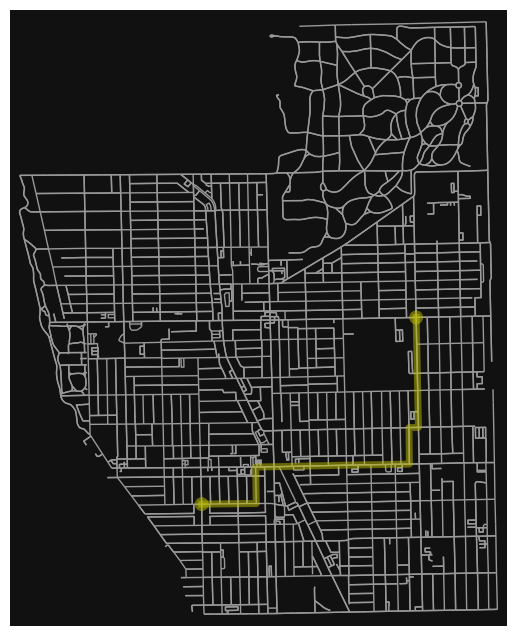

In [304]:
# try new routing - modify function manually
# get closest nodes on graph to origin and destination
coord1_node = get_nearest_node(bn, bean_bagel)
coord2_node = get_nearest_node(bn, side_practice)

# plot (example taken from osmnx git examples)
route = ox.shortest_path(new_bike, coord1_node, coord2_node, weight="weight_cycle")
fig, ax = ox.plot_graph_route(new_bike, route, route_color="y", route_linewidth=5, node_size=0) 

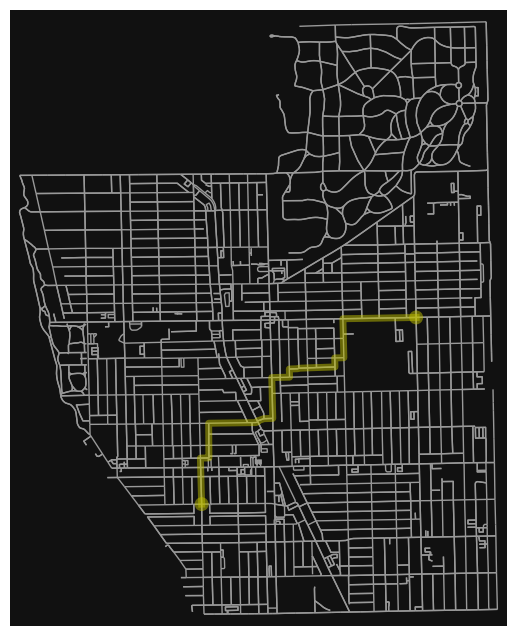

In [303]:
# try new routing - modify function manually
# get closest nodes on graph to origin and destination
coord1_node = get_nearest_node(bn, bean_bagel)
coord2_node = get_nearest_node(bn, side_practice)

# plot (example taken from osmnx git examples)
route = ox.shortest_path(bike_graph, coord1_node, coord2_node)
fig, ax = ox.plot_graph_route(bike_graph, route, route_color="y", route_linewidth=5, node_size=0) 